In [1]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(500, 8)

In [15]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [19]:
X_train.shape

(400, 7)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [93]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158 (632.00 B)

 Trainable params: 158 (632.00 B)

 Non-trainable params: 0 (0.00 B)

In [95]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [96]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2054.9736 - val_loss: 1613.9602
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1470.0272 - val_loss: 1125.2678
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1022.6362 - val_loss: 752.5118
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 672.8972 - val_loss: 461.2773
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 391.9328 - val_loss: 221.7940
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 176.9826 - val_loss: 80.5454
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 61.4173 - val_loss: 24.0504
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.1222 - val_loss: 5.5876
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8339 - val_loss: 0.5945
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3353 - val_loss: 0.0363


In [97]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-31.34114164056455

In [100]:
import matplotlib.pyplot as plt


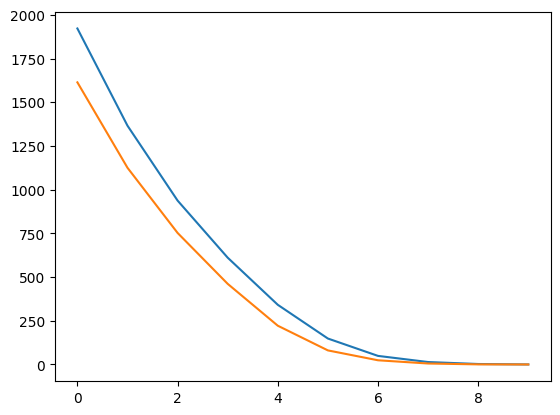

In [101]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])